In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path
import re

from datetime import datetime

In [25]:
def get_window_datetimes(file_name):
    file_name = file_name.replace("-", "_")
    re_string = r'\((.*?)\)' # regex string for finding window start and end dates

    match = re.findall(re_string, file_name)
    start = match[0].split("_")
    start_month = int(start[0])
    start_day = int(start[1])
    start_year = int(start[2])
    start_dt = datetime(month=start_month, day=start_day, year=start_year)
    
    end = match[1].split("_")
    end_month = int(end[0])
    end_day = int(end[1])
    end_year = int(end[2])
    try:
        end_dt = datetime(month=end_month, day=end_day, year=end_year)
    except ValueError as ve:
        print("%s/%s/%s is not a valid date. Ignoring this file" % (end_month, end_day, end_year))
        return None
    return start_dt, end_dt

# Loading Data

In [61]:
def string_to_int(s):
    s = s.strip()
    if not s:
        return 0
    else:
        return int(s)

In [62]:
data_dir_loc = Path('../data/OTV_DATA_05142020/OTV - Shared Data/Vimeo/Vimeo Source')

data_dir = data_dir_loc.glob('*.csv')

source_dfs = []
for filepath in tqdm(data_dir):
    df = pd.read_csv(str(filepath))
    dts = get_window_datetimes(filepath.stem)
    if (dts == None) or (dts[0].year < 2015):
        continue
    start_dt, end_dt = dts
    df['start_dt'] = start_dt
    df['end_dt'] = end_dt
    df['month'] = start_dt.month
    df['year'] = start_dt.year
    df = df.drop(columns=['Unnamed: 0', 'index'], errors='ignore')
    source_dfs.append(df)
    #print("{:%b %Y}".format(start_dt))
    
source_df = pd.concat(source_dfs)
source_df = source_df.reset_index()
source_df['plays'] = source_df['plays'].apply(string_to_int)
source_df = source_df.drop(columns=['index'])


9/31/2011 is not a valid date. Ignoring this file



In [75]:
for year, s_df in source_df.groupby('year'):
    print("%s:" % year)
    domains_plays_df = s_df.groupby('domain').agg({'plays':sum}).sort_values(by='plays', ascending=False).head(10)
    for i, (ind, row) in enumerate(domains_plays_df.iterrows()):
        print("\t%s: %s (%.1f)" % (i+1, ind, row['plays']))

2015:
	1: vimeo.com (7417.0)
	2: onemorelesbian.com (4696.0)
	3: weareopen.tv (4165.0)
	4: unknown (3105.0)
	5: buzzfeed.com (2319.0)
	6: youresotalented.net (1869.0)
	7: lesbian-interest.com (1821.0)
	8: facebook.com (1247.0)
	9: lesbianmedia.tv (381.0)
	10: curvemag.com (290.0)
2016:
	1: vimeo.com (29336.0)
	2: remezcla.com (27489.0)
	3: weareopen.tv (8931.0)
	4: onemorelesbian.com (4559.0)
	5: facebook.com (4510.0)
	6: unknown (3111.0)
	7: lesbian-interest.com (2894.0)
	8: autostraddle.com (2875.0)
	9: youresotalented.net (2631.0)
	10: browngirlswebseries.com (2572.0)
2017:
	1: vimeo.com (55237.0)
	2: browngirlswebseries.com (36583.0)
	3: weareopen.tv (23887.0)
	4: remezcla.com (13848.0)
	5: unknown (13581.0)
	6: weareo.tv (9010.0)
	7: brujostv.com (7591.0)
	8: out.com (3824.0)
	9: youresotalented.net (1526.0)
	10: thetwebseries.com (1366.0)
2018:
	1: vimeo.com (46933.0)
	2: browngirlswebseries.com (25859.0)
	3: weareo.tv (16330.0)
	4: unknown (15012.0)
	5: weareopen.tv (3327.0)
	6:

In [78]:
for year, s_df in source_df.groupby('year'):
    print("%s:" % year)
    domains_plays_df = s_df.groupby('domain').agg({'total_seconds':sum}).sort_values(by='total_seconds', ascending=False).head(10)
    for i, (ind, row) in enumerate(domains_plays_df.iterrows()):
        print("\t%s: %s (%s minutes of play)" % (i+1, ind, row['total_seconds'] // 60))

2015:
	1: vimeo.com (39635.0 minutes of play)
	2: weareopen.tv (18491.0 minutes of play)
	3: buzzfeed.com (11411.0 minutes of play)
	4: youresotalented.net (10679.0 minutes of play)
	5: onemorelesbian.com (8157.0 minutes of play)
	6: facebook.com (5870.0 minutes of play)
	7: unknown (3686.0 minutes of play)
	8: lesbian-interest.com (3233.0 minutes of play)
	9: blavity.com (1974.0 minutes of play)
	10: zackarydrucker.com (1124.0 minutes of play)
2016:
	1: vimeo.com (193435.0 minutes of play)
	2: weareopen.tv (116606.0 minutes of play)
	3: remezcla.com (63905.0 minutes of play)
	4: onemorelesbian.com (53173.0 minutes of play)
	5: facebook.com (21332.0 minutes of play)
	6: youresotalented.net (16806.0 minutes of play)
	7: unknown (7369.0 minutes of play)
	8: safe.txmblr.com (6546.0 minutes of play)
	9: autostraddle.com (6530.0 minutes of play)
	10: kingisafink.com (6256.0 minutes of play)
2017:
	1: vimeo.com (407348.0 minutes of play)
	2: browngirlswebseries.com (255877.0 minutes of play)

In [80]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# Minutes Watched by website referred and year

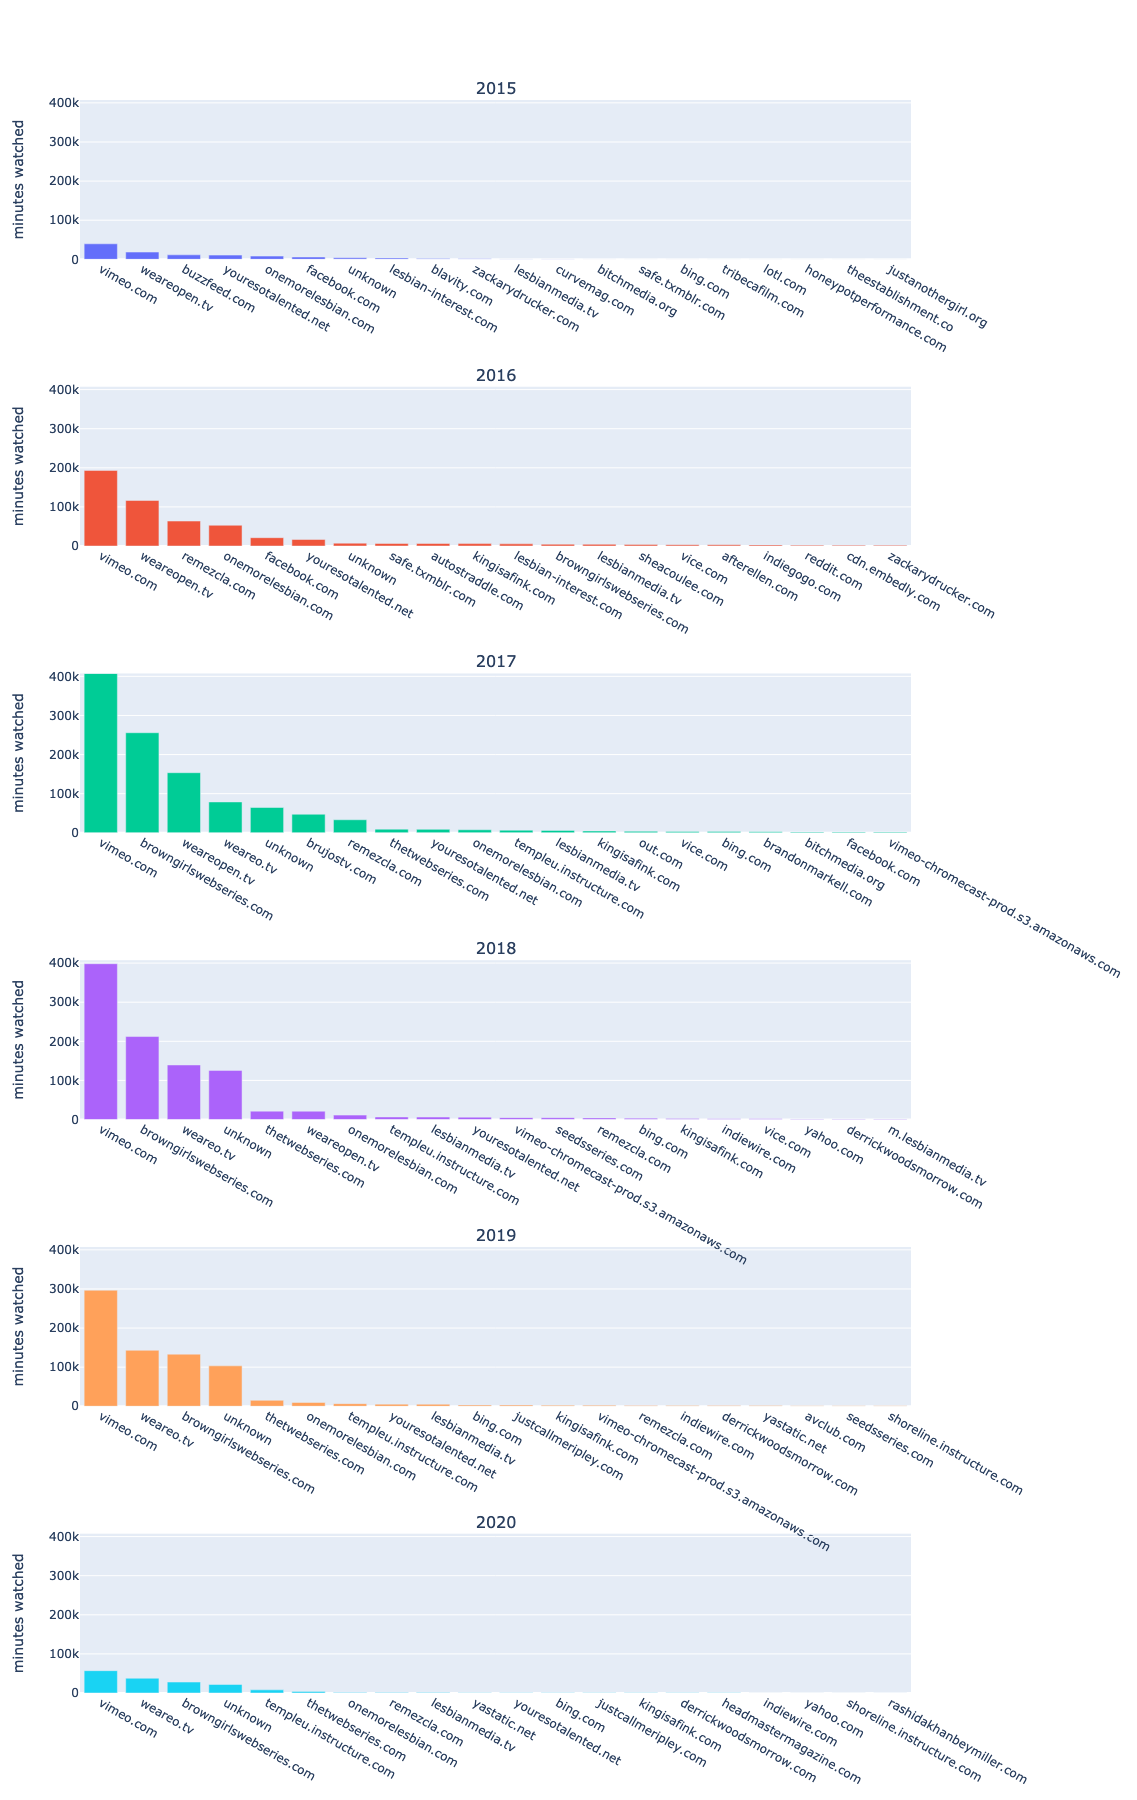

In [120]:
years = sorted(source_df.year.unique())
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.08)

year_grouped_source_df = source_df.groupby('year')

max_y = 0
for i, year in enumerate(years):
    year_df = year_grouped_source_df.get_group(year)
    metric_df = year_df.groupby('domain').agg({'total_seconds':sum}).sort_values(by='total_seconds', ascending=False).head(20)
    
    max_y = max(max_y, metric_df['total_seconds'].max() // 60.)

    trace = go.Bar(x=metric_df.index, y=metric_df['total_seconds'] // 60., name=str(year))
    fig.add_trace(trace, row=i+1, col=1)

for i, year in enumerate(years):
    fig.update_yaxes(title='minutes watched', range=[0, max_y], row=i+1, col=1)
    
fig.update_layout(height=1800, width=1000, showlegend=False)
fig.show()

# log(minutes watched by year and website traffic)

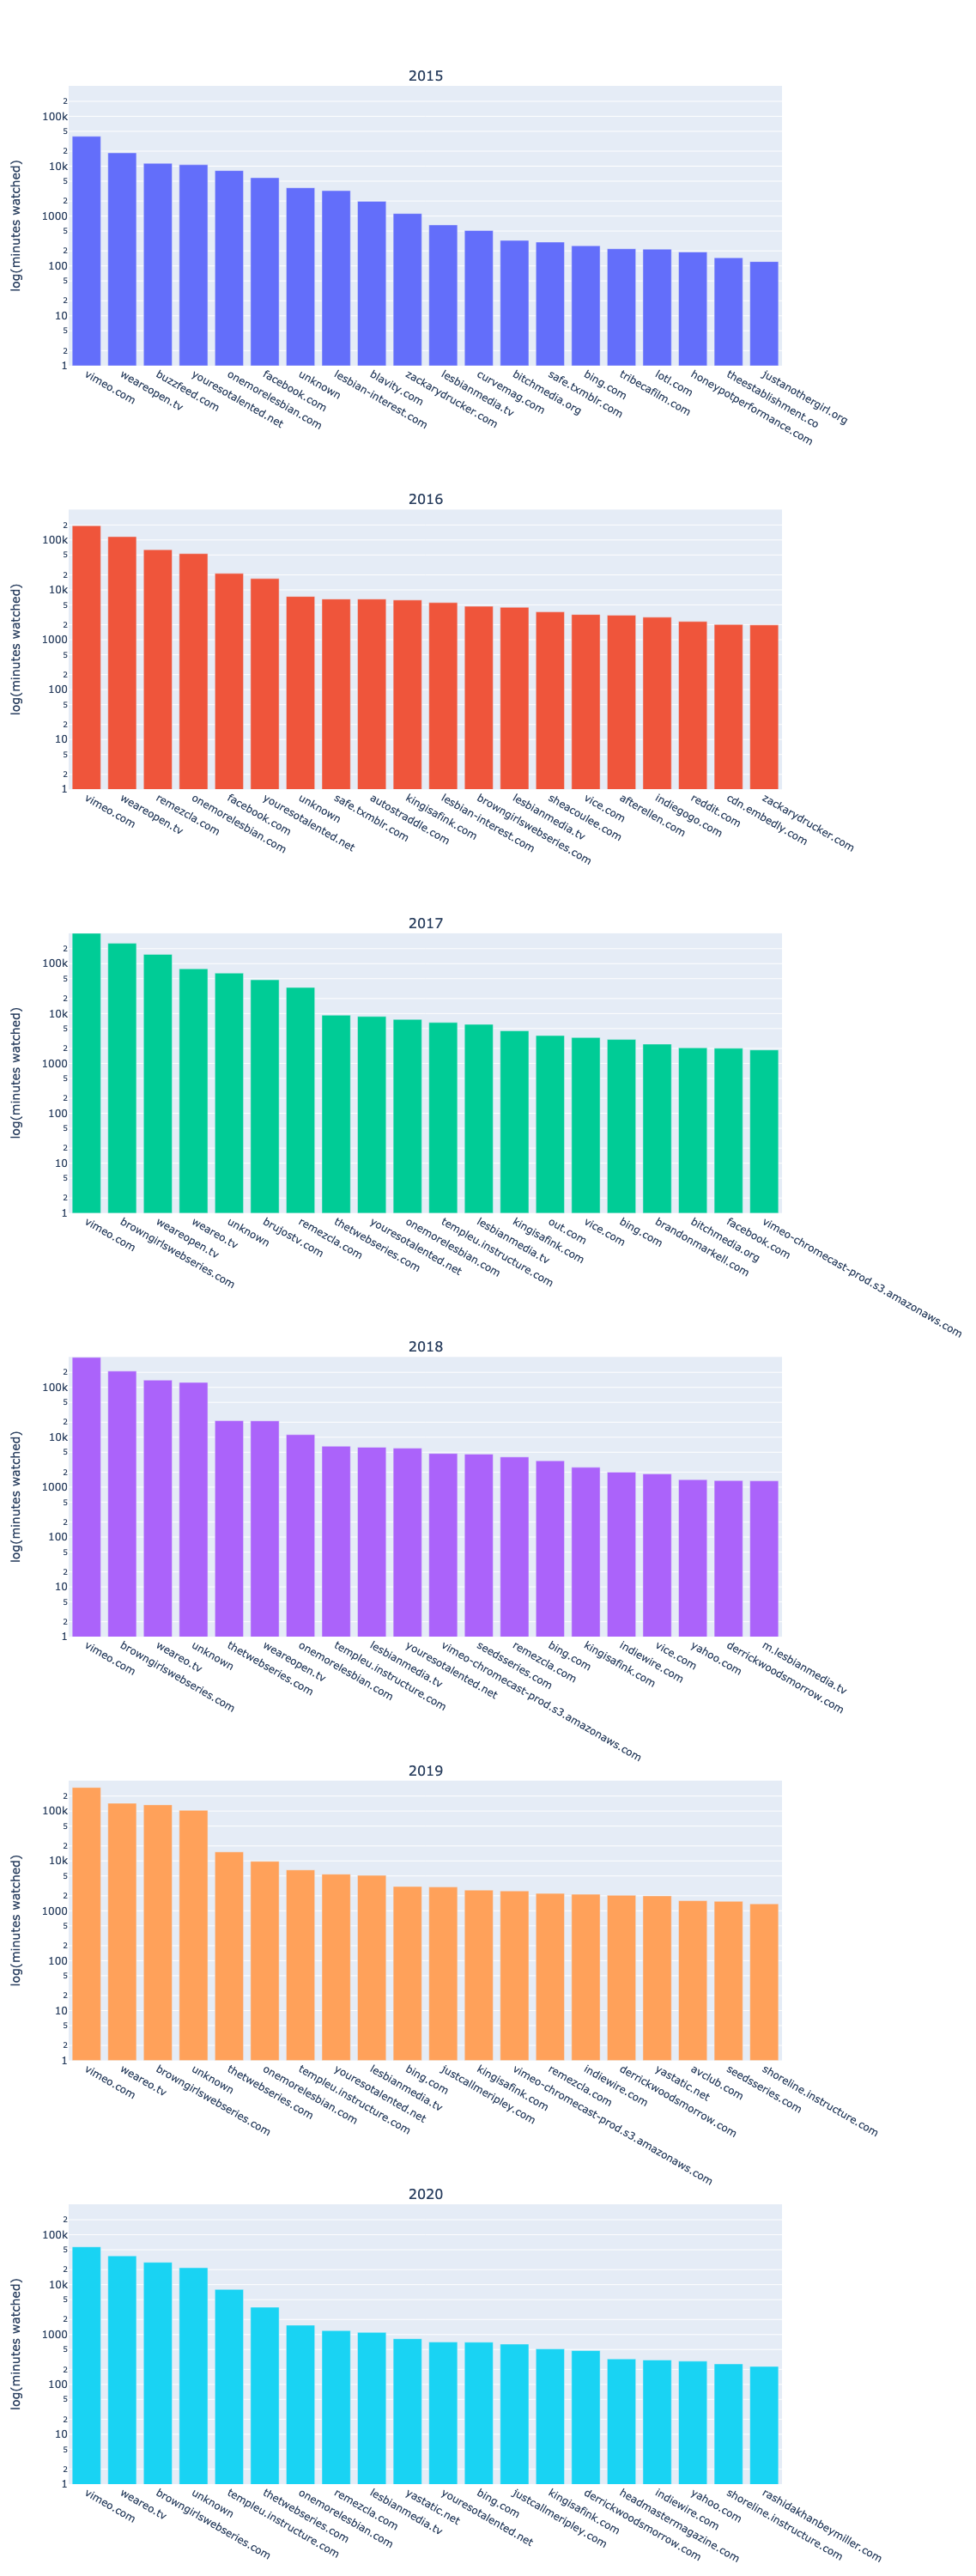

In [132]:
years = sorted(source_df.year.unique())
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.06)

year_grouped_source_df = source_df.groupby('year')

max_y = 0

for i, year in enumerate(years):
    year_df = year_grouped_source_df.get_group(year)
    #year_df = year_df[year_df['domain'] != 'vimeo.com']
    metric_df = year_df.groupby('domain').agg({'total_seconds':sum}).sort_values(by='total_seconds', ascending=False).head(20)
    
    max_y = max(max_y, metric_df['total_seconds'].max() // 60.)
    
    trace = go.Bar(x=metric_df.index, y=metric_df['total_seconds']//60, name=str(year))
    fig.add_trace(trace, row=i+1, col=1)    

for i, year in enumerate(years):
    fig.update_yaxes(title='log(minutes watched)', type='log', range=[0, np.log10(max_y)], row=i+1, col=1)

fig.update_layout(height=3000, width=1200, showlegend=False)
fig.show()

# Average Minutes Watched by year and traffice source website

#### IMPORT NOTE: 
`vimeo.com` had an incredibly high number for 2015 and `onemorelesbian.com` had an incredibly high number for 2016.
These outliers made it incredibly difficult to see the rest of the data. See code notes for details on including these sites.

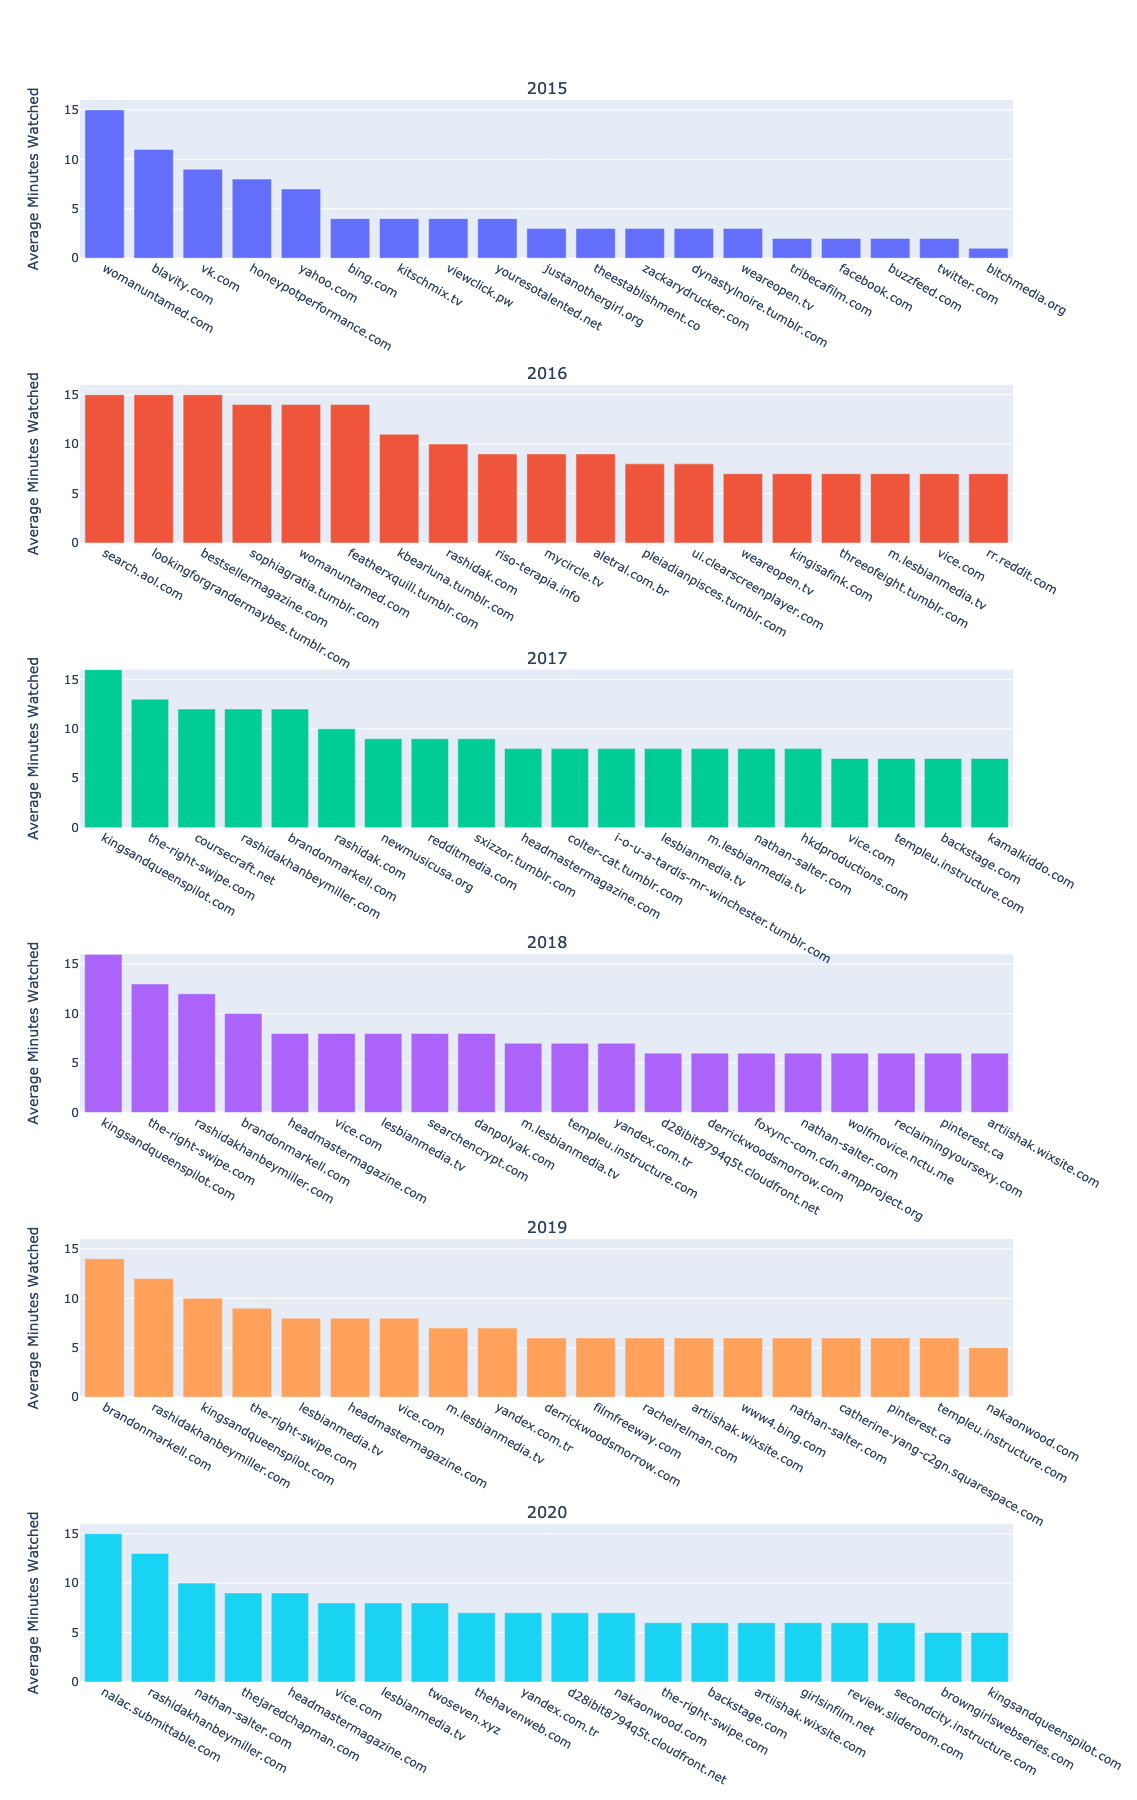

In [146]:
years = sorted(source_df.year.unique())
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.08)

year_grouped_source_df = source_df.groupby('year')

max_y = 0
for i, year in enumerate(years):
    year_df = year_grouped_source_df.get_group(year)
    metric_df = year_df.groupby('domain').agg({'mean_seconds':np.mean}).sort_values(by='mean_seconds', ascending=False).head(20)
    
    metric_df = metric_df[~metric_df.index.isin(['vimeo.com', 'onemorelesbian.com'])] # comment this out to keep vimeo.com and onemorelesbian.com in
    
    max_y = max(max_y, metric_df['mean_seconds'].max() // 60.)

    trace = go.Bar(x=metric_df.index, y=metric_df['mean_seconds'] // 60., name=str(year))
    fig.add_trace(trace, row=i+1, col=1)

for i, year in enumerate(years):
    fig.update_yaxes(title='Average Minutes Watched', range=[0, max_y], row=i+1, col=1)
    
fig.update_layout(height=1800, width=1000, showlegend=False)
fig.show()

# plays and loads by year and website traffic

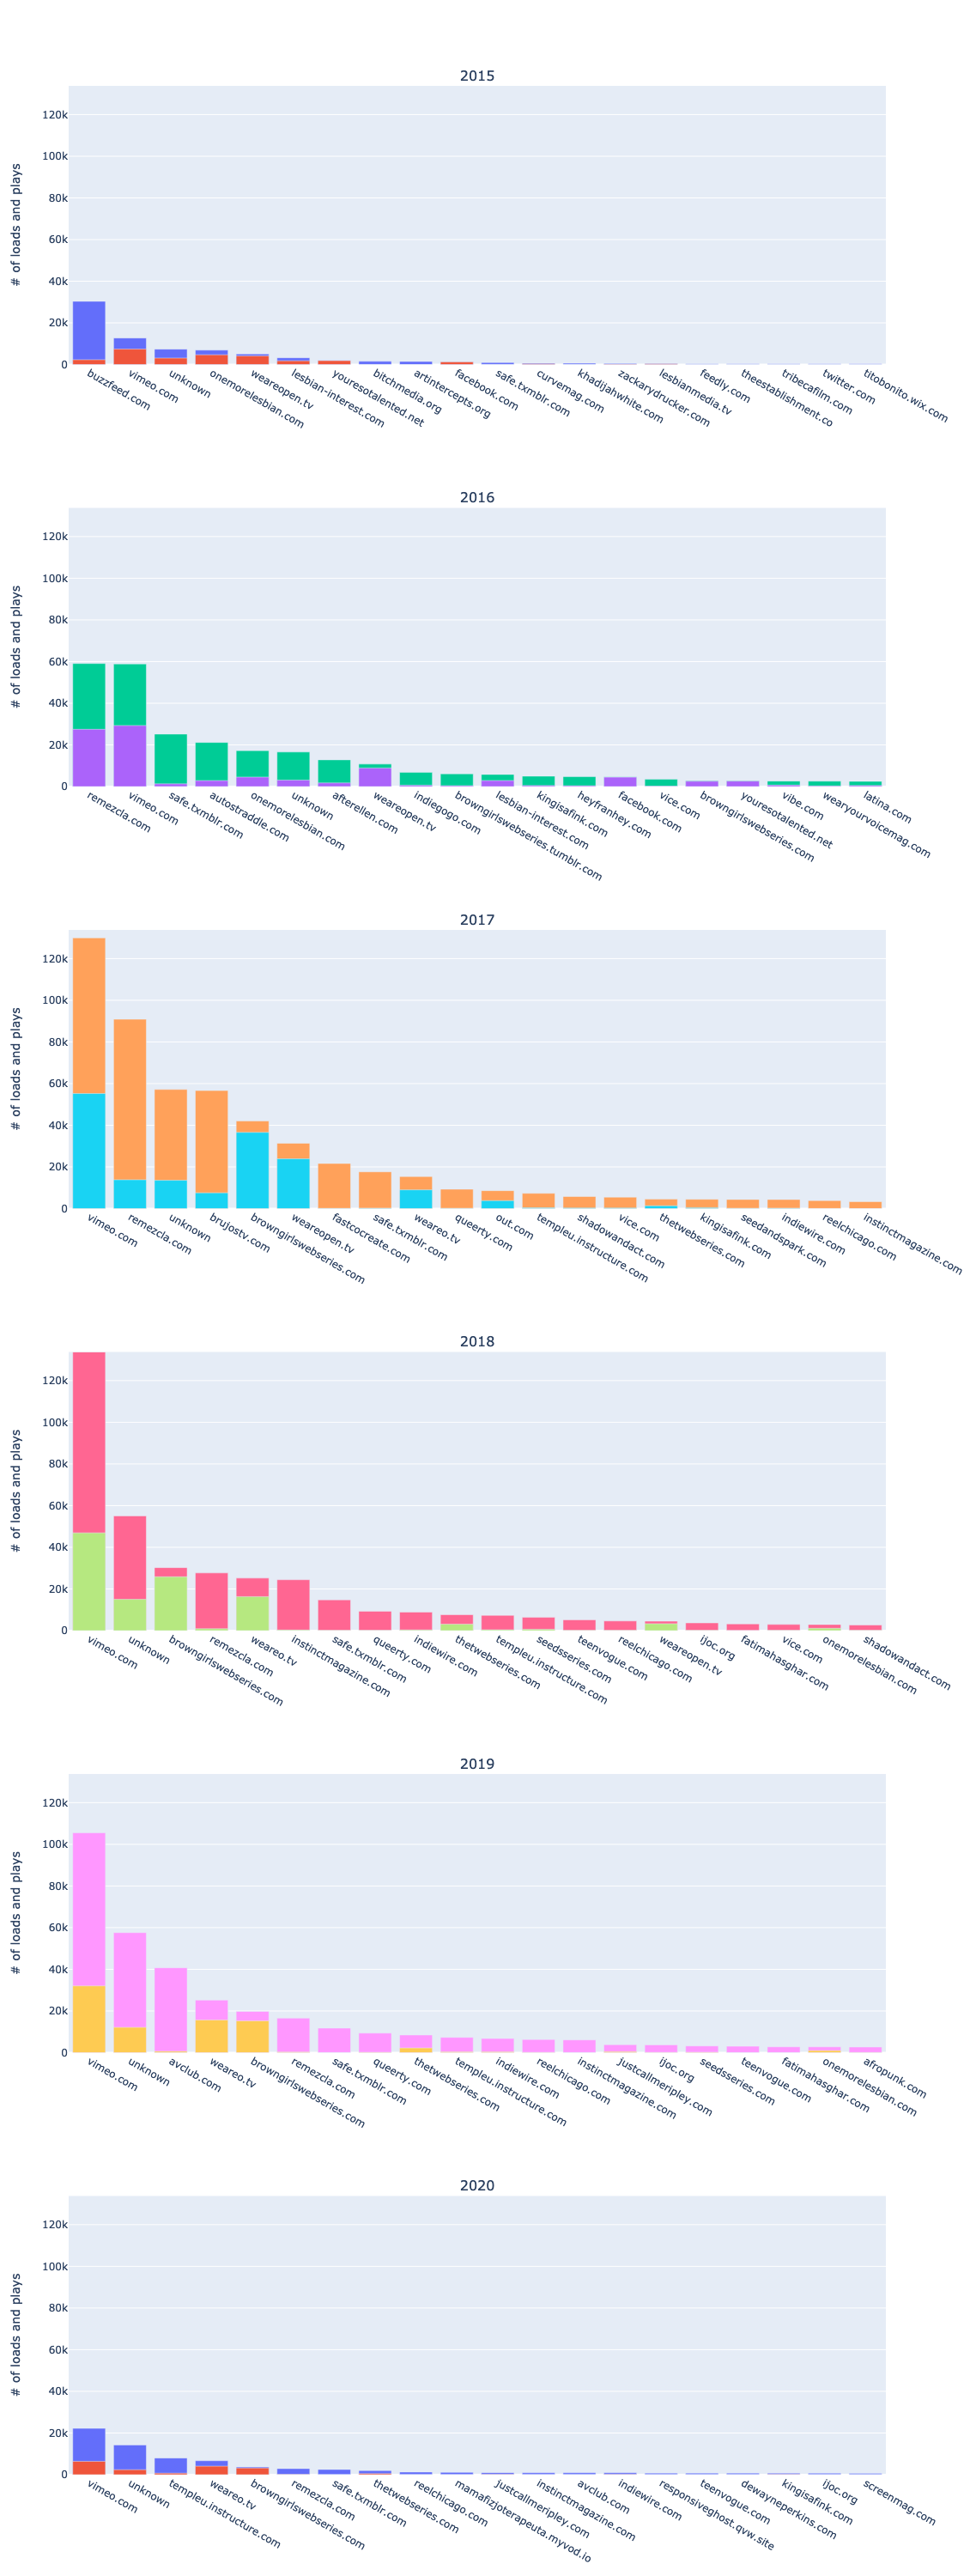

In [136]:
years = sorted(source_df.year.unique())
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.06)

year_grouped_source_df = source_df.groupby('year')

max_y = 0

for i, year in enumerate(years):
    year_df = year_grouped_source_df.get_group(year)
    #year_df = year_df[year_df['domain'] != 'vimeo.com']
    metric_df = year_df.groupby('domain').agg({'loads':sum, 'plays':sum}).sort_values(by='loads', ascending=False).head(20)
    
    max_y = max(max_y, metric_df['loads'].max())
    
    load_trace = go.Bar(x=metric_df.index, y=metric_df['loads'], name='loads')
    play_trace = go.Bar(x=metric_df.index, y=metric_df['plays'], name='plays')
    
    fig.add_trace(load_trace, row=i+1, col=1)
    fig.add_trace(play_trace, row=i+1, col=1)
    #fig.update_layout(barmode='stack', row=i+1, col=1)

for i, year in enumerate(years):
    fig.update_yaxes(title='# of loads and plays', range=[0, max_y], row=i+1, col=1)

fig.update_layout(height=3000, width=1200, showlegend=False, barmode='overlay')
fig.show()

# plays by traffic source site and year

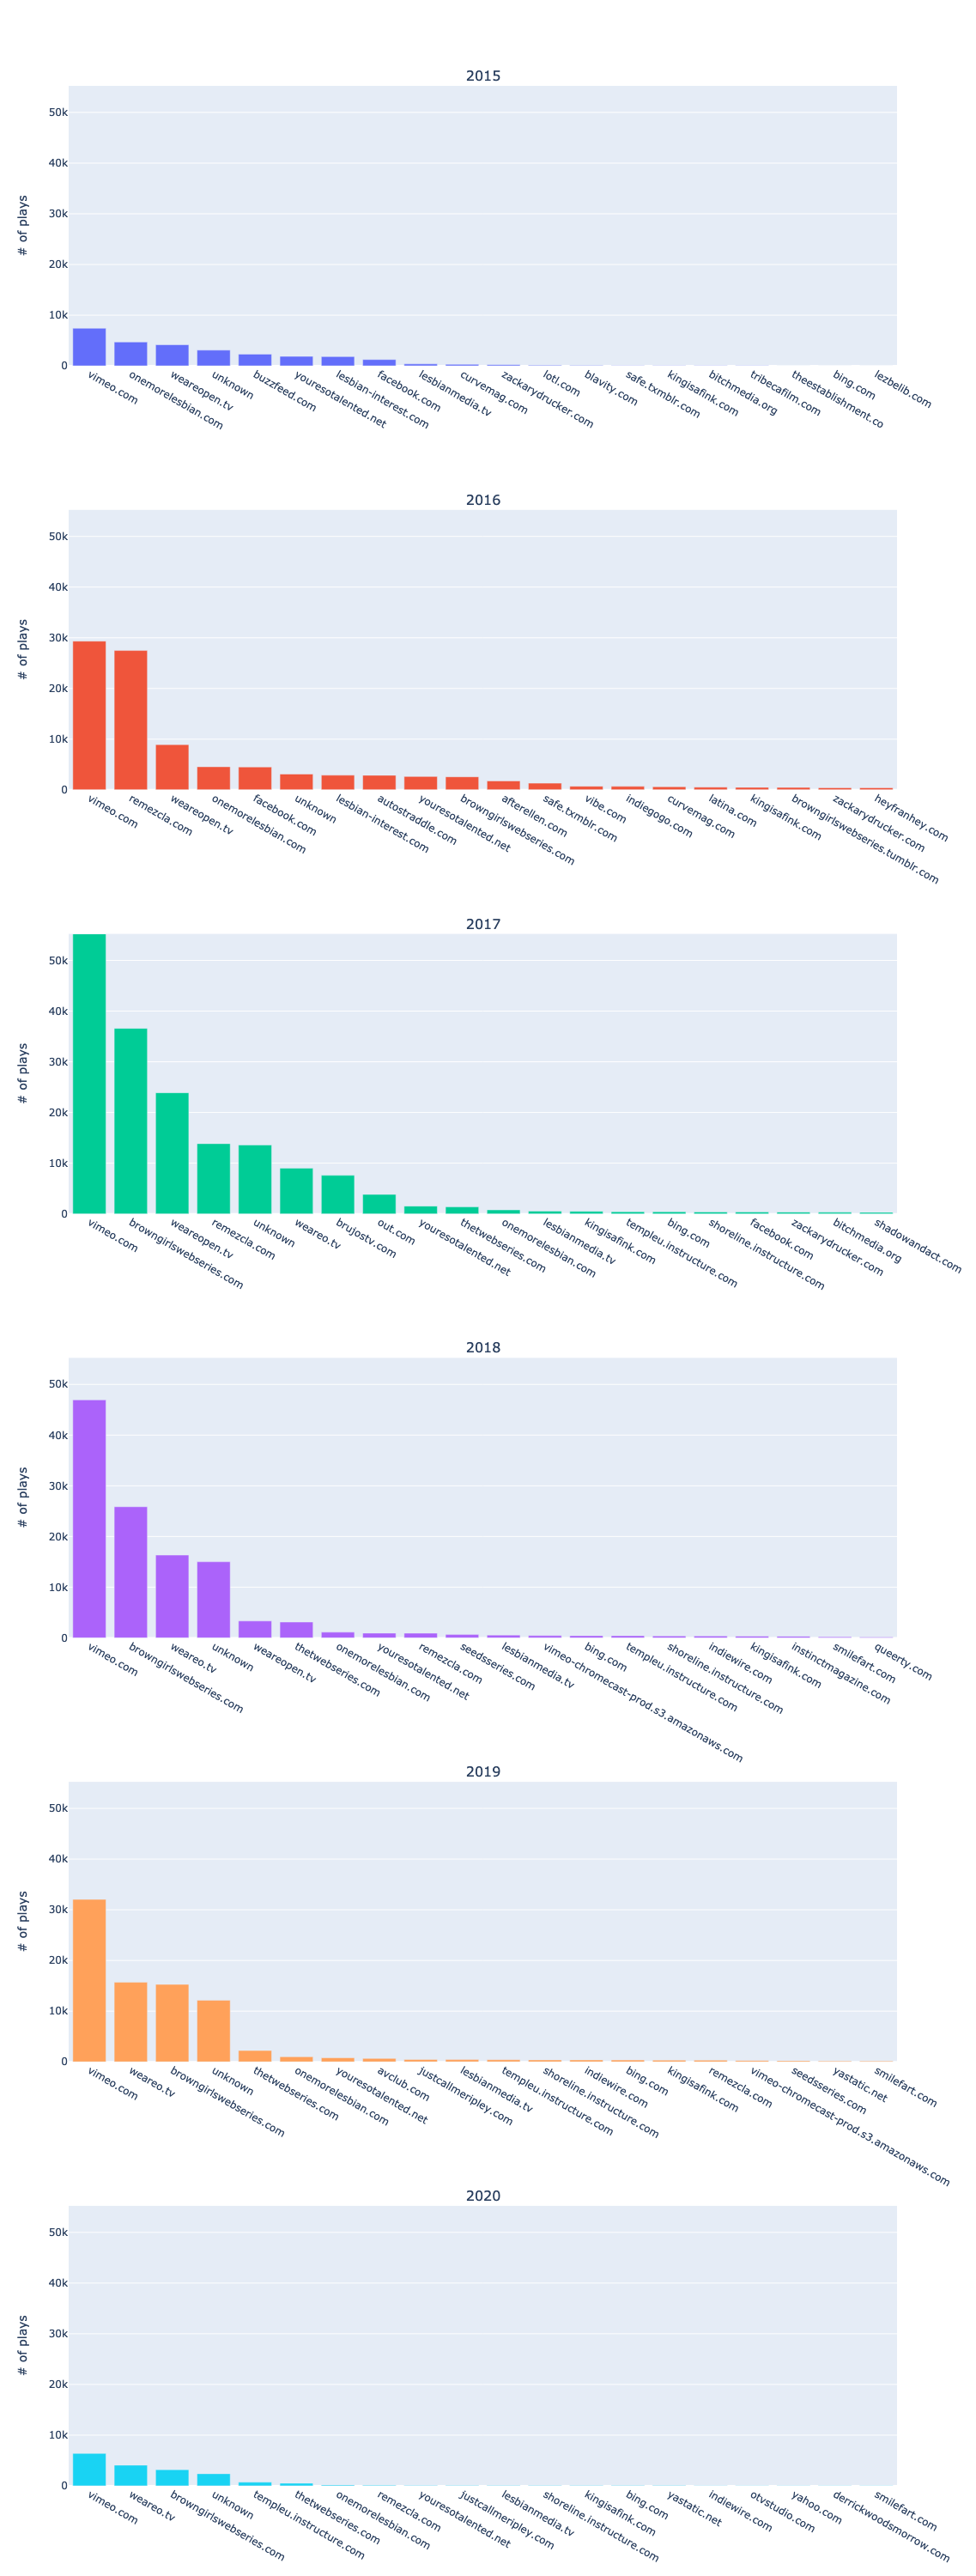

In [140]:
years = sorted(source_df.year.unique())
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.06)

year_grouped_source_df = source_df.groupby('year')

max_y = 0

for i, year in enumerate(years):
    year_df = year_grouped_source_df.get_group(year)
    #year_df = year_df[year_df['domain'] != 'vimeo.com']
    metric_df = year_df.groupby('domain').agg({'plays':sum}).sort_values(by='plays', ascending=False).head(20)
    
    max_y = max(max_y, metric_df['plays'].max())
    
    play_trace = go.Bar(x=metric_df.index, y=metric_df['plays'], name=str(year))
    
    fig.add_trace(play_trace, row=i+1, col=1)
    #fig.update_layout(barmode='stack', row=i+1, col=1)

for i, year in enumerate(years):
    fig.update_yaxes(title='# of plays', range=[0, max_y], row=i+1, col=1)

fig.update_layout(height=3000, width=1200, showlegend=False)
fig.show()

# Number of unique viewers by traffic source website and year

#### IMPORTANT NOTE:
`unique_viewers` does not seem to have been tracked before 2017. As such, years before 2017 are excluded

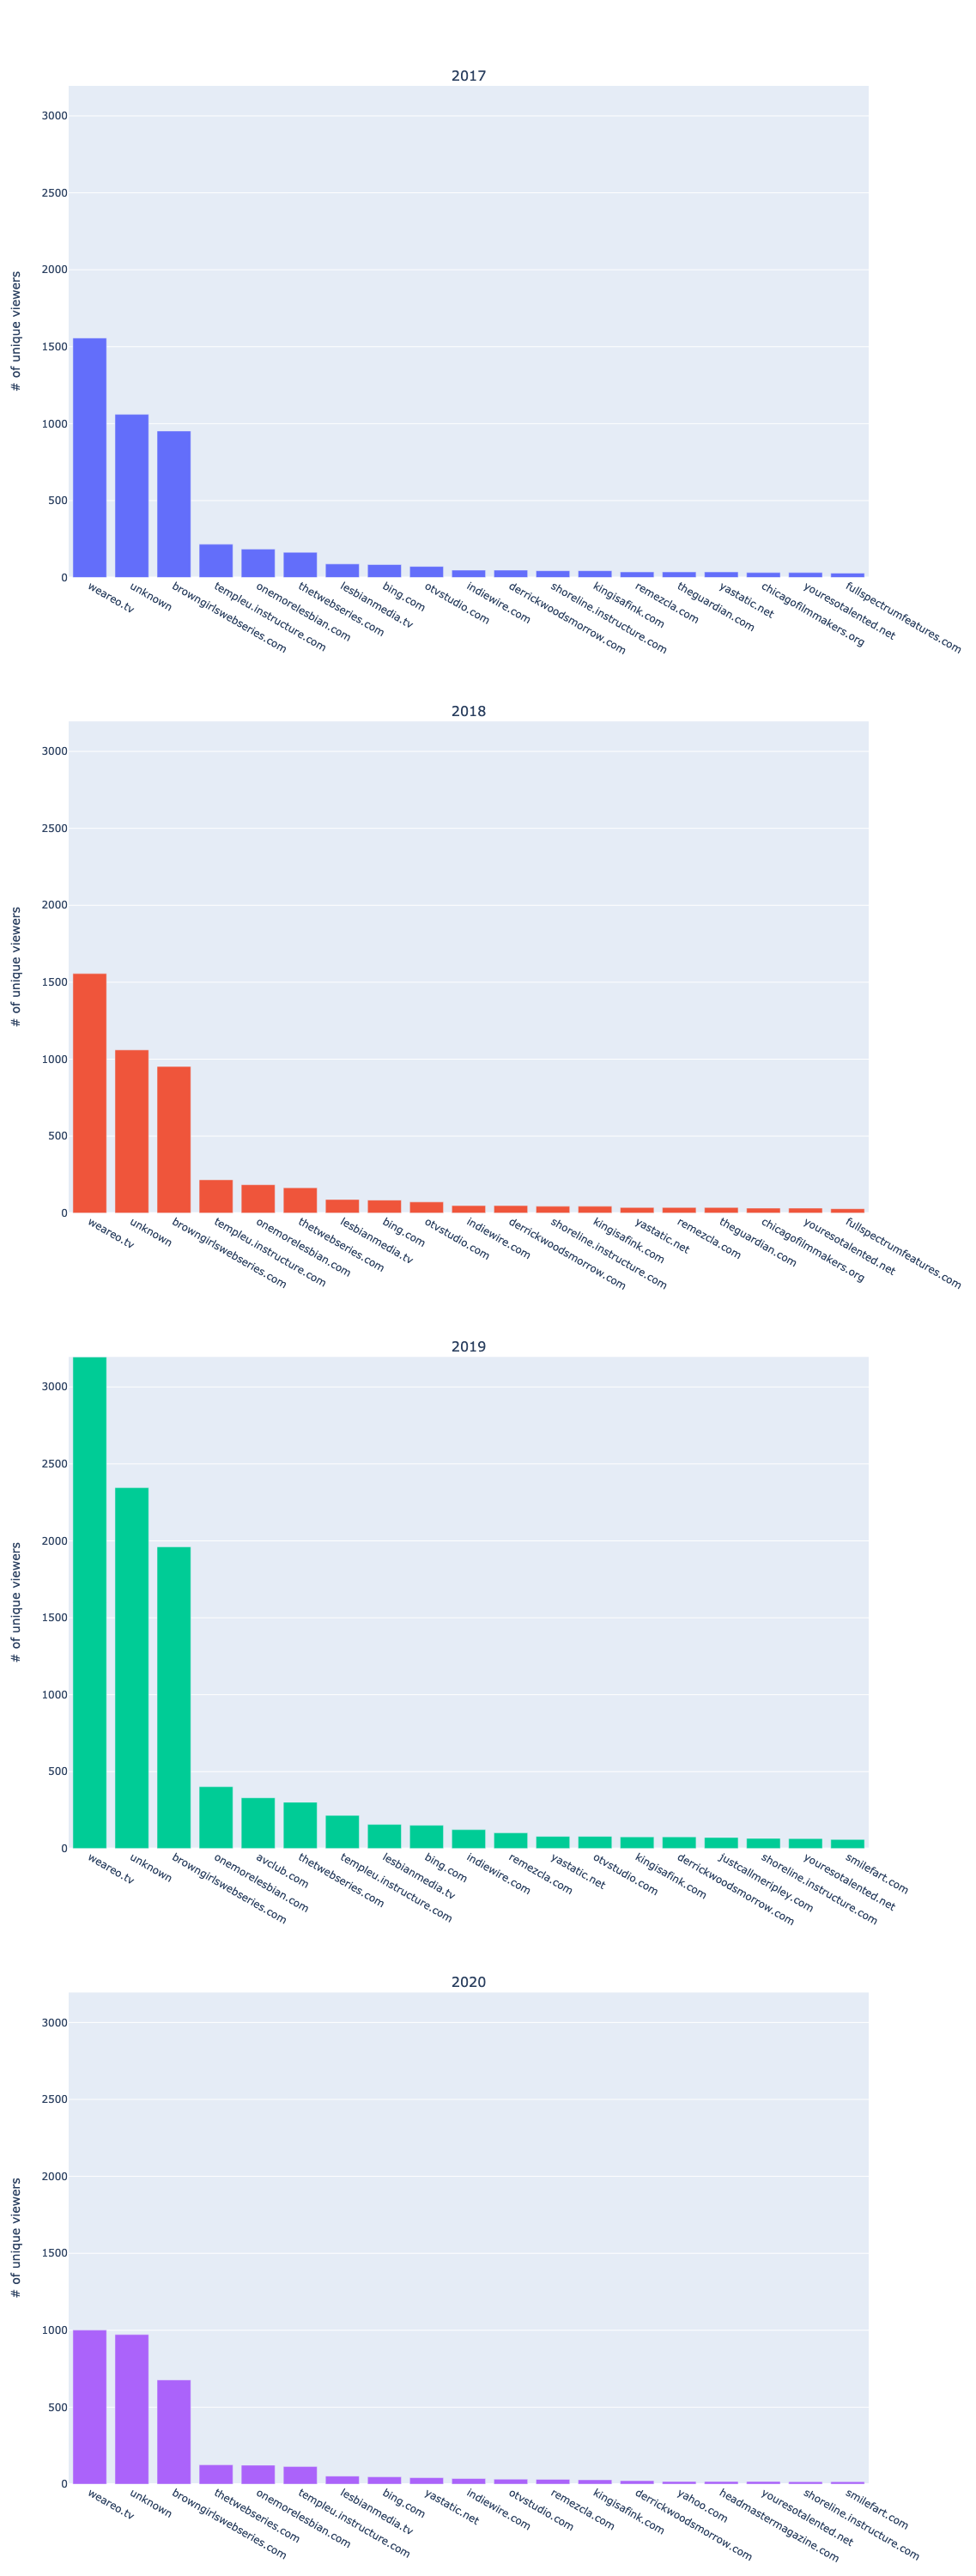

In [155]:
years = [y for y in sorted(source_df.year.unique()) if y > 2016]
fig = make_subplots(rows=len(years), cols=1, subplot_titles=[str(y) for y in years], vertical_spacing=0.06)

year_grouped_source_df = source_df.groupby('year')

max_y = 0

for i, year in enumerate(years):
    if year <= 2016:
        continue
    year_df = year_grouped_source_df.get_group(year)
    #year_df = year_df[year_df['domain'] != 'vimeo.com']
    metric_df = year_df.groupby('domain').agg({'unique_viewers':sum}).sort_values(by='unique_viewers', ascending=False).head(20)
    
    metric_df = metric_df[~metric_df.index.isin(['vimeo.com'])] # comment this out to keep vimeo.com and onemorelesbian.com in

    max_y = max(max_y, metric_df['unique_viewers'].max())
    

    play_trace = go.Bar(x=metric_df.index, y=metric_df['unique_viewers'], name=str(year))
    
    fig.add_trace(play_trace, row=i+1, col=1)
    #fig.update_layout(barmode='stack', row=i+1, col=1)

for i, year in enumerate(years):
    fig.update_yaxes(title='# of unique viewers', range=[0, max_y], row=i+1, col=1)

fig.update_layout(height=3000, width=1200, showlegend=False)
fig.show()